분석 시작...
기본 통계:
             userid  sum_gamerounds   retention_1   retention_7
count  9.018900e+04    90189.000000  90189.000000  90189.000000
mean   4.998412e+06       51.872457      0.445210      0.186065
std    2.883286e+06      195.050858      0.496992      0.389161
min    1.160000e+02        0.000000      0.000000      0.000000
25%    2.512230e+06        5.000000      0.000000      0.000000
50%    4.995815e+06       16.000000      0.000000      0.000000
75%    7.496452e+06       51.000000      1.000000      0.000000
max    9.999861e+06    49854.000000      1.000000      1.000000

버전별 분포:
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64
총 표본 크기: 90,189개

처치 효과 기초 분석:
1일 리텐션 단순 평균 처치효과: -0.0059
7일 리텐션 단순 평균 처치효과: -0.0082

t-test 분석 결과

[1일 리텐션 t-test 결과]
------------------------------
Control Group (gate_30)
- 평균: 0.4482
- 표본 크기: 44,700명

Treatment Group (gate_40)
- 평균: 0.4423
- 표본 크기: 45,489명

검정 통계량
- t-통계량: 1.7841
- p-value: 0.0744
- 통계적 유의성: 유의하지 않음 (α=0.05 기

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}

1일 리텐션 인과효과:
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                       
─────────────────(E[retention_1|sum_gamerounds])
d[version_binary]                               
Estimand assumption 1, Unconfoundedness: If U→{version_binary} and U→retention_1 then P(retention_1|version_binary,sum_gamerounds,U) = P(retention_1|version_binary,sum_gamerounds)

## Realized estimand
b: retention_1~version_binary+sum_gamerounds
Target units: ate

## Estimate
Mean value: -0.005322427883198366


7일 리텐션 인과효과:
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d              

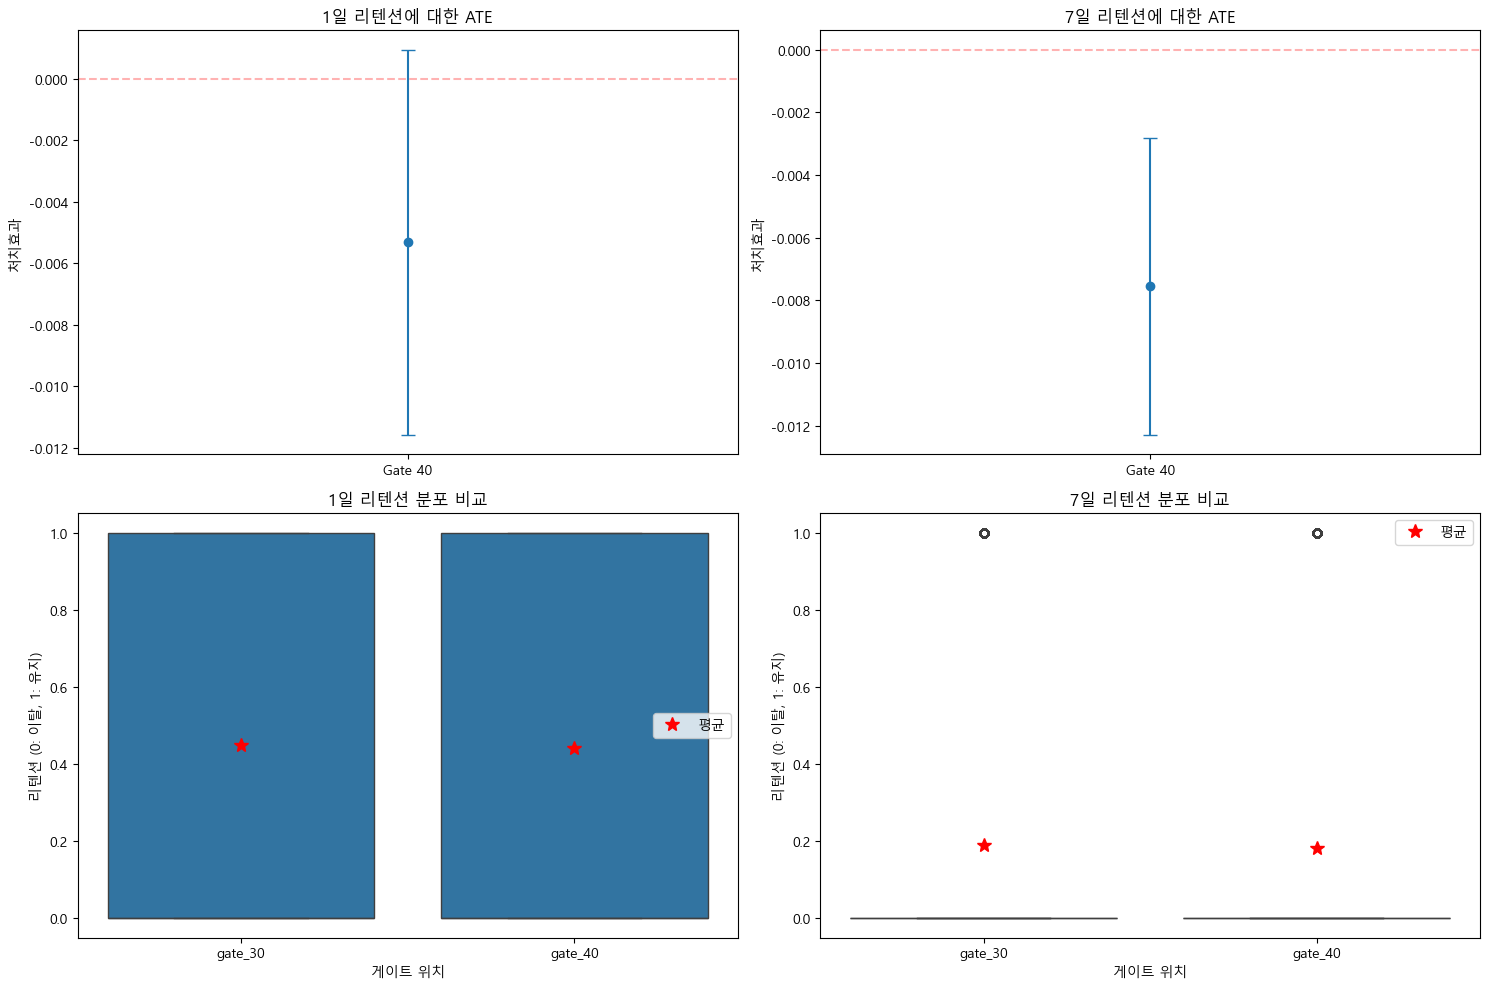

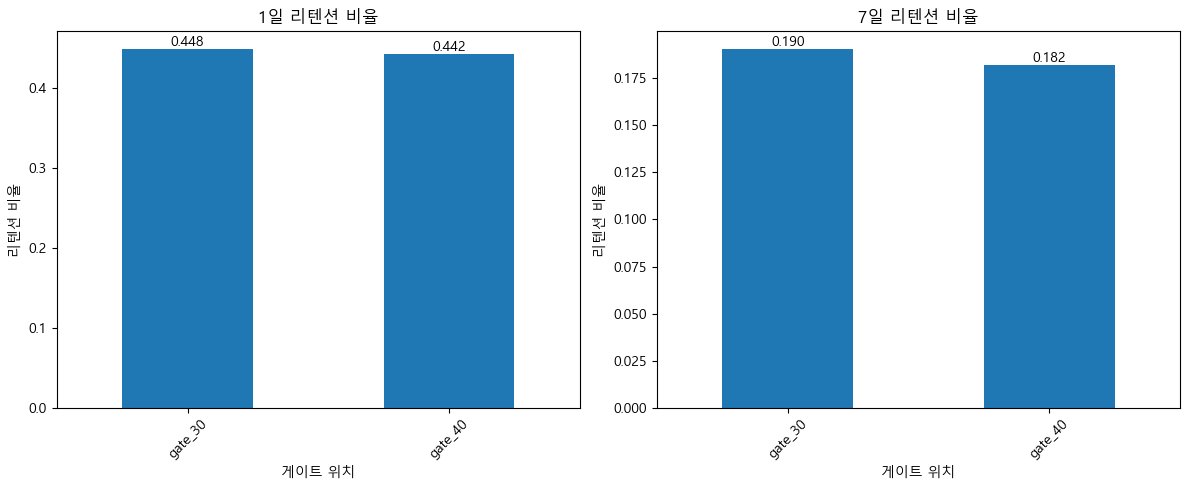


분석이 완료되었습니다.


In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
DATA_PATH = r"C:\Users\davie\Desktop\github\causal-inference-capstone-project\data\Mobile Games AB Testing_cookie_cats.csv"
df = pd.read_csv(DATA_PATH)

# 기본 통계 분석
def basic_analysis(df):
    print("="*50)
    print("기본 통계:")
    print("="*50)
    print(df.describe())
    
    print("\n" + "="*50)
    print("버전별 분포:")
    print("="*50)
    print(df['version'].value_counts())
    print(f"총 표본 크기: {len(df):,}개")
    
    # 처치군과 대조군의 평균 결과 비교
    print("\n" + "="*50)
    print("처치 효과 기초 분석:")
    print("="*50)
    control_retention1 = df[df['version'] == 'gate_30']['retention_1'].mean()
    treated_retention1 = df[df['version'] == 'gate_40']['retention_1'].mean()
    print(f"1일 리텐션 단순 평균 처치효과: {treated_retention1 - control_retention1:.4f}")
    
    control_retention7 = df[df['version'] == 'gate_30']['retention_7'].mean()
    treated_retention7 = df[df['version'] == 'gate_40']['retention_7'].mean()
    print(f"7일 리텐션 단순 평균 처치효과: {treated_retention7 - control_retention7:.4f}")
    
    # t-test 분석 추가
    print("\n" + "="*50)
    print("t-test 분석 결과")
    print("="*50)
    
    # 1일 리텐션 t-test
    control_1 = df[df['version'] == 'gate_30']['retention_1']
    treated_1 = df[df['version'] == 'gate_40']['retention_1']
    t_stat_1, p_val_1 = stats.ttest_ind(control_1, treated_1)
    
    print("\n[1일 리텐션 t-test 결과]")
    print("-"*30)
    print(f"Control Group (gate_30)")
    print(f"- 평균: {control_retention1:.4f}")
    print(f"- 표본 크기: {len(control_1):,}명")
    print(f"\nTreatment Group (gate_40)")
    print(f"- 평균: {treated_retention1:.4f}")
    print(f"- 표본 크기: {len(treated_1):,}명")
    print(f"\n검정 통계량")
    print(f"- t-통계량: {t_stat_1:.4f}")
    print(f"- p-value: {p_val_1:.4f}")
    print(f"- 통계적 유의성: {'유의함' if p_val_1 < 0.05 else '유의하지 않음'} (α=0.05 기준)")
    
    # 7일 리텐션 t-test
    control_7 = df[df['version'] == 'gate_30']['retention_7']
    treated_7 = df[df['version'] == 'gate_40']['retention_7']
    t_stat_7, p_val_7 = stats.ttest_ind(control_7, treated_7)
    
    print("\n[7일 리텐션 t-test 결과]")
    print("-"*30)
    print(f"Control Group (gate_30)")
    print(f"- 평균: {control_retention7:.4f}")
    print(f"- 표본 크기: {len(control_7):,}명")
    print(f"\nTreatment Group (gate_40)")
    print(f"- 평균: {treated_retention7:.4f}")
    print(f"- 표본 크기: {len(treated_7):,}명")
    print(f"\n검정 통계량")
    print(f"- t-통계량: {t_stat_7:.4f}")
    print(f"- p-value: {p_val_7:.4f}")
    print(f"- 통계적 유의성: {'유의함' if p_val_7 < 0.05 else '유의하지 않음'} (α=0.05 기준)")
    
    # 효과 크기 해석 추가
    print("\n" + "="*50)
    print("효과 크기 해석")
    print("="*50)
    print("1일 리텐션 효과:")
    print(f"- 절대적 차이: {(treated_retention1 - control_retention1)*100:.2f}%p")
    print(f"- 상대적 차이: {((treated_retention1 - control_retention1)/control_retention1)*100:.2f}%")
    
    print("\n7일 리텐션 효과:")
    print(f"- 절대적 차이: {(treated_retention7 - control_retention7)*100:.2f}%p")
    print(f"- 상대적 차이: {((treated_retention7 - control_retention7)/control_retention7)*100:.2f}%")

# ATE 추정을 위한 회귀분석
def regression_analysis(df):
    # 데이터 준비
    df_copy = df.copy()
    # version을 이진형 변수로 변환 (gate_30: 0, gate_40: 1)
    df_copy['version_binary'] = (df_copy['version'] == 'gate_40').astype(int)
    
    # 공변량 정규화
    scaler = StandardScaler()
    df_copy['sum_gamerounds_scaled'] = scaler.fit_transform(df_copy[['sum_gamerounds']])
    
    # 회귀분석을 위한 X 매트릭스 준비
    X = pd.DataFrame({
        'version': df_copy['version_binary'],
        'sum_gamerounds': df_copy['sum_gamerounds_scaled']
    })
    X = sm.add_constant(X)  # 상수항 추가
    
    # 1일 리텐션에 대한 회귀분석
    y1 = df_copy['retention_1'].astype(int)
    model1 = sm.OLS(y1, X).fit(cov_type='HC1')
    
    # 7일 리텐션에 대한 회귀분석
    y7 = df_copy['retention_7'].astype(int)
    model7 = sm.OLS(y7, X).fit(cov_type='HC1')
    
    print("\n" + "="*50)
    print("회귀분석을 통한 ATE 추정:")
    print("="*50)
    print("\n1일 리텐션에 대한 처치효과:")
    print(f"ATE: {model1.params['version']:.4f}")
    print(f"표준오차: {model1.bse['version']:.4f}")
    print(f"p-value: {model1.pvalues['version']:.4f}")
    
    print("\n7일 리텐션에 대한 처치효과:")
    print(f"ATE: {model7.params['version']:.4f}")
    print(f"표준오차: {model7.bse['version']:.4f}")
    print(f"p-value: {model7.pvalues['version']:.4f}")
    
    return model1, model7

# 인과추론 분석 (DoWhy를 사용한 ATE 추정)
def causal_analysis(df):
    # 데이터 준비
    df_copy = df.copy()
    df_copy['version_binary'] = (df_copy['version'] == 'gate_40').astype(int)
    
    print("\n" + "="*50)
    print("DoWhy를 사용한 인과효과 분석:")
    print("="*50)
    
    # 1일 리텐션에 대한 인과효과 분석
    model_1day = CausalModel(
        data=df_copy,
        treatment='version_binary',
        outcome='retention_1',
        common_causes=['sum_gamerounds']
    )
    
    # 7일 리텐션에 대한 인과효과 분석
    model_7day = CausalModel(
        data=df_copy,
        treatment='version_binary',
        outcome='retention_7',
        common_causes=['sum_gamerounds']
    )
    
    # 1일 리텐션 분석
    identified_estimand_1 = model_1day.identify_effect(proceed_when_unidentifiable=True)
    estimate_1 = model_1day.estimate_effect(
        identified_estimand_1,
        method_name="backdoor.linear_regression",
        control_value=0,  # gate_30
        treatment_value=1  # gate_40
    )
    
    # 7일 리텐션 분석
    identified_estimand_7 = model_7day.identify_effect(proceed_when_unidentifiable=True)
    estimate_7 = model_7day.estimate_effect(
        identified_estimand_7,
        method_name="backdoor.linear_regression",
        control_value=0,  # gate_30
        treatment_value=1  # gate_40
    )
    
    print("\n1일 리텐션 인과효과:")
    print(estimate_1)
    print("\n7일 리텐션 인과효과:")
    print(estimate_7)

# 시각화
def create_visualizations(df, reg_model1, reg_model7):
    # 전체 figure 크기 설정
    plt.figure(figsize=(15, 10))
    
    # 1. ATE 시각화 (상단)
    plt.subplot(2, 2, 1)
    ate_1day = reg_model1.params['version']
    ci_1day = reg_model1.conf_int().loc['version']
    
    plt.errorbar(['Gate 40'], [ate_1day], 
                yerr=[[ate_1day - ci_1day[0]], [ci_1day[1] - ate_1day]],
                fmt='o', capsize=5)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.title('1일 리텐션에 대한 ATE')
    plt.ylabel('처치효과')
    
    plt.subplot(2, 2, 2)
    ate_7day = reg_model7.params['version']
    ci_7day = reg_model7.conf_int().loc['version']
    
    plt.errorbar(['Gate 40'], [ate_7day], 
                yerr=[[ate_7day - ci_7day[0]], [ci_7day[1] - ate_7day]],
                fmt='o', capsize=5)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.title('7일 리텐션에 대한 ATE')
    plt.ylabel('처치효과')
    
    # 2. t-test 결과 시각화 (하단)
    # 1일 리텐션 boxplot
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='version', y='retention_1')
    plt.title('1일 리텐션 분포 비교')
    plt.xlabel('게이트 위치')
    plt.ylabel('리텐션 (0: 이탈, 1: 유지)')
    
    # 평균값 표시
    means_1 = df.groupby('version')['retention_1'].mean()
    plt.plot(['gate_30', 'gate_40'], means_1.values, 'r*', markersize=10, label='평균')
    plt.legend()
    
    # 7일 리텐션 boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='version', y='retention_7')
    plt.title('7일 리텐션 분포 비교')
    plt.xlabel('게이트 위치')
    plt.ylabel('리텐션 (0: 이탈, 1: 유지)')
    
    # 평균값 표시
    means_7 = df.groupby('version')['retention_7'].mean()
    plt.plot(['gate_30', 'gate_40'], means_7.values, 'r*', markersize=10, label='평균')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # 3. 리텐션 비율 시각화 (막대 그래프)
    plt.figure(figsize=(12, 5))
    
    # 1일 리텐션 비율
    plt.subplot(1, 2, 1)
    retention_1_props = df.groupby('version')['retention_1'].mean()
    retention_1_props.plot(kind='bar')
    plt.title('1일 리텐션 비율')
    plt.xlabel('게이트 위치')
    plt.ylabel('리텐션 비율')
    plt.xticks(rotation=45)
    
    # 값 레이블 추가
    for i, v in enumerate(retention_1_props):
        plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
    
    # 7일 리텐션 비율
    plt.subplot(1, 2, 2)
    retention_7_props = df.groupby('version')['retention_7'].mean()
    retention_7_props.plot(kind='bar')
    plt.title('7일 리텐션 비율')
    plt.xlabel('게이트 위치')
    plt.ylabel('리텐션 비율')
    plt.xticks(rotation=45)
    
    # 값 레이블 추가
    for i, v in enumerate(retention_7_props):
        plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    plt.close()

def main():
    print("분석 시작...")
    
    # 데이터 전처리
    df['retention_1'] = df['retention_1'].astype(int)
    df['retention_7'] = df['retention_7'].astype(int)
    
    # 분석 실행
    basic_analysis(df)
    reg_model1, reg_model7 = regression_analysis(df)
    causal_analysis(df)
    create_visualizations(df, reg_model1, reg_model7)
    
    print("\n분석이 완료되었습니다.")

if __name__ == "__main__":
    main()